In [10]:
""" 
Jessie Covington

Testing of shuffles(list: deck)

"""

import numpy as np
import matplotlib.pyplot as plt
import plotly.plotly as py
from sys import argv
%matplotlib inline

from shuffles import shuffle

## not the most sophisticated, but will tell us if we have a grouping of three consecutive cards in our decks
## unfortunately will also return higher numbers when there is a grouping of more than 3, so not quite correct
## ex: [1, 2, 3, 4, 5] --> 3 consecutive groups of 3 cards - but since it is ordered
def three_consecutive(deck):
    count = 0
    for i in range(len(deck)-2):
        diff = deck[i+1] - deck[i]
        if (abs(deck[i+2] - deck[i+1]) == diff) and (abs(deck[i+1] - deck[i]) == diff):
            count += 1
        else:
            count = count
    return count

def repeated(deck):
    count = 0
    for i in range(len(deck)-1):
        if deck[i] == deck[i+1]:
            count+=1
        else:
            count = count
    return count

## f = open('shuffles_notes.txt', 'r') 
## contents = f.read()
## print(contents)


## some initial things that will be used throughout:
## this won't be used, but
D0 = np.array(range(0,0)) ## I just want to make sure we won't get an error with an empty list as input, you never know
S0 = shuffle(D0) ## works no problem
## print(S0) --> [] - as it should

## now the decks we'll actually be considering:
D13 = list(range(0, 13))
D26 = list(range(0, 26))
D52 = list(range(0, 52))
D104 = list(range(0, 104))

deck_list = np.array([D13, D26, D52, D104]) ## keep all our original decks in one place together
n = len(deck_list)  ## this will be used throughout - number of original and shuffled decks

num_shuffles = 10 ## how many shuffles do we want to try?

### so we can keep track of what the deck looks like after each individual shuffle:
deck1_shuffles = np.zeros((num_shuffles+1, len(D13)))
deck2_shuffles = np.zeros((num_shuffles+1, len(D26)))
deck3_shuffles = np.zeros((num_shuffles+1, len(D52)))
deck4_shuffles = np.zeros((num_shuffles+1, len(D104)))

deck1_shuffles[0] = D13
deck2_shuffles[0] = D26
deck3_shuffles[0] = D52
deck4_shuffles[0] = D104

In [11]:
print("Let's consider where the original top and bottom cards of the unshuffled deck end up after %s shuffles." %(num_shuffles))
print()

top_card_num_arr = np.zeros(n) ## keep track of our first to see where it ends up - in this case they're all 0
## but might have a case where it's not later, so.
bottom_card_num_arr = np.zeros(n) ## keep track of last element so we can see where it ends up

init_top_card_index = np.zeros(n) ## so we can compare later - all will remain zero since first index
init_bottom_card_index = np.zeros(n)

new_top_card_index = np.zeros(n) ## store the index of where the original top card ends up
new_bottom_card_index = np.zeros(n) ## '' '' bottom '' ''

## so we can keep our original decks if we need to use them later and bc otherwise Si won't be recognized
S1 = D13
S2 = D26
S3 = D52
S4 = D104

## shuffle each deck however many times we wanted to shuffle (declared above)
for i in range(1, num_shuffles):
    S1 = shuffle(S1).tolist()
    S2 = shuffle(S2).tolist()
    S3 = shuffle(S3).tolist()
    S4 = shuffle(S4).tolist()

    deck1_shuffles[i] = S1
    deck2_shuffles[i] = S2
    deck3_shuffles[i] = S3
    deck4_shuffles[i] = S4

## putting them in a list to make easier and shorter to access
shuffled_deck_list = [S1, S2, S3, S4]

for i in range(n):
    ## store the first and last elements(top and bottom cards) of each deck
    top_card_num_arr[i] = deck_list[0][0]
    bottom_card_num_arr[i] = deck_list[i][-1]

    ## find indices of bottom card of deck (doing this way in case we change our deck sizes later)
    init_bottom_card_index[i] = len(deck_list[i]) - 1

    ## store the index of where the first and last cards moved
    new_top_card_index[i] = shuffled_deck_list[i].index(top_card_num_arr[i])
    new_bottom_card_index[i] = shuffled_deck_list[i].index(bottom_card_num_arr[i])

    ## shuffled_deck_list[i] = shuffled_deck_list[i].tolist()
    ## print("The shuffled deck %s is: \n %s \n" %(i+1, shuffled_deck_list[i]) )

        
## print(init_top_card_index, init_bottom_card_index)
## print(new_top_card_index, new_bottom_card_index)
for i in range(len(deck_list)):
    print("%s cards: \n%s" %(len(deck_list[i]), shuffled_deck_list[i]))
    print()
    print("%s cards, initial index %s (top card) --> index %s" %(len(deck_list[i]), init_top_card_index[i], new_top_card_index[i]))
    print("Top card moved %s positions" %(new_top_card_index[i] - init_top_card_index[i]))
    print("%s cards, initial index %s (bottom card) --> index %s" %(len(deck_list[i]), init_bottom_card_index[i], new_bottom_card_index[i]))
    print("Bottom card moved %s positions" %(init_bottom_card_index[i] - new_bottom_card_index[i]))
    print()

       
## if enough time, try to do a few more, graph, and compare to see how many spaces it moves more generally
## ideally, would also be able to make a histogram or something of how many times each element appears in a certain position

Let's consider where the original top and bottom cards of the unshuffled deck end up after 10 shuffles.

13 cards: 
[2.0, 7.0, 4.0, 12.0, 0.0, 6.0, 8.0, 11.0, 9.0, 1.0, 5.0, 3.0, 10.0]

13 cards, initial index 0.0 (top card) --> index 4.0
Top card moved 4.0 positions
13 cards, initial index 12.0 (bottom card) --> index 3.0
Bottom card moved 9.0 positions

26 cards: 
[16.0, 6.0, 19.0, 0.0, 12.0, 13.0, 1.0, 7.0, 14.0, 5.0, 3.0, 9.0, 25.0, 8.0, 22.0, 23.0, 18.0, 21.0, 4.0, 2.0, 10.0, 15.0, 20.0, 24.0, 17.0, 11.0]

26 cards, initial index 0.0 (top card) --> index 3.0
Top card moved 3.0 positions
26 cards, initial index 25.0 (bottom card) --> index 12.0
Bottom card moved 13.0 positions

52 cards: 
[28.0, 25.0, 0.0, 37.0, 24.0, 45.0, 19.0, 22.0, 51.0, 48.0, 13.0, 3.0, 11.0, 38.0, 43.0, 49.0, 4.0, 5.0, 46.0, 23.0, 39.0, 34.0, 12.0, 9.0, 14.0, 2.0, 30.0, 33.0, 17.0, 36.0, 7.0, 50.0, 41.0, 21.0, 47.0, 42.0, 8.0, 35.0, 16.0, 26.0, 18.0, 32.0, 40.0, 44.0, 15.0, 6.0, 1.0, 27.0, 31.0, 20.0, 10.0, 2

In [12]:
print("Let's look at whether there are still groups of consecutive cards.")
print("We'll consider a consecutive group to be 3 ordered cards in a row.")
print()   

Let's look at whether there are still groups of consecutive cards.
We'll consider a consecutive group to be 3 ordered cards in a row.



Let's compare consecutive shuffles of 26 cards:

Shuffle 0: [  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.
  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.]

Shuffle 1: [  0.   1.   2.   3.  20.   4.   5.  21.   6.   7.   8.   9.  10.  22.  11.
  23.  12.  13.  14.  15.  24.  16.  17.  18.  19.  25.]

Shuffle 2: [  9.  10.   0.  22.   1.   2.   3.  11.  20.  23.  12.   4.  13.  14.  15.
  24.  16.   5.  17.  21.  18.   6.  19.   7.  25.   8.]

Shuffle 3: [  9.  24.  10.  16.   0.  22.   5.  17.  21.   1.   2.  18.   3.  11.  20.
   6.  23.  19.  12.   4.  13.  14.  15.   7.  25.   8.]

Shuffle 4: [  9.  11.  24.  10.  16.  20.   6.   0.  22.  23.   5.  19.  12.   4.  17.
  13.  21.   1.   2.  14.  18.  15.   7.  25.   3.   8.]

Shuffle 5: [  5.   9.  11.  19.  12.   4.  17.  24.  13.  21.  10.  16.  20.   6.   1.
   2.   0.  14.  22.  18.  23.  15.   7.  25.   3.   8.]

Shuffle 6: [ 16.  20.   6.   1.   2.   0.  14.   5.   9.  22.  11.  19.  12.  18.

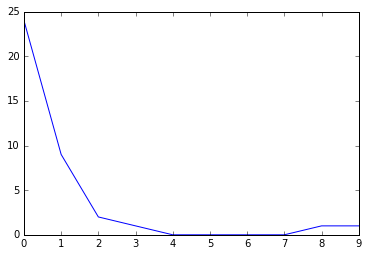

In [25]:
print("Let's compare consecutive shuffles of 26 cards:")
print()
grps = np.zeros(num_shuffles)
for row in range(num_shuffles):
    print("Shuffle %s: %s\n" %(row, deck2_shuffles[row]))
    grps[row] = three_consecutive(deck2_shuffles[row])
print("List of number of ordered sequences at each iteration: ", grps)
plt.plot(grps)
plt.show()

Let's compare consecutive shuffles of 52 cards:

Shuffle 0: [  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.
  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.  29.
  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.  43.  44.
  45.  46.  47.  48.  49.  50.  51.]

Shuffle 1: [  0.   1.   2.  27.  28.   3.   4.   5.  29.   6.   7.  30.  31.  32.   8.
   9.  10.  33.  34.  35.  11.  12.  13.  36.  37.  38.  39.  40.  41.  14.
  15.  42.  43.  16.  44.  17.  18.  45.  19.  20.  21.  46.  47.  48.  22.
  49.  50.  23.  24.  25.  26.  51.]

Shuffle 2: [ 36.   0.  37.   1.  38.  39.  40.  41.   2.  27.  28.  14.  15.   3.   4.
  42.  43.   5.  29.   6.   7.  16.  30.  44.  17.  31.  18.  32.   8.  45.
   9.  10.  19.  20.  33.  21.  46.  34.  47.  35.  48.  11.  22.  49.  50.
  23.  24.  25.  26.  51.  12.  13.]

Shuffle 3: [ 36.   0.  31.  18.  37.  32.   8.   1.  45.   9.  38.  39.  10.  40.  41.
   2.  27.  28.  19.  20.  14.  3

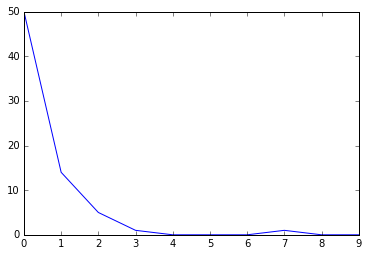

In [14]:
print("Let's compare consecutive shuffles of 52 cards:")
print()
grps = np.zeros(num_shuffles)
for row in range(num_shuffles):
    print("Shuffle %s: %s\n" %(row, deck3_shuffles[row]))
    grps[row] = three_consecutive(deck3_shuffles[row])
print("List of number of ordered sequences at each iteration: ", grps)
print("And we can see that at around 7 shuffles, we stop seeing two number groupings as much as well.")
plt.plot(grps)
plt.show()

Let's compare consecutive shuffles of 104 cards:

List of number of ordered sequences at each iteration:  [ 102.   23.    5.    2.    2.    0.    0.    0.    2.    0.]


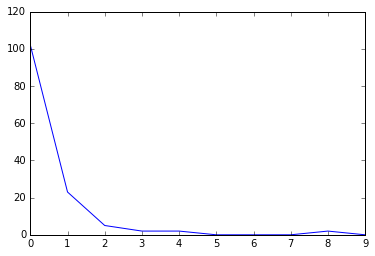

In [26]:
print("Let's compare consecutive shuffles of 104 cards:")
print()
grps = np.zeros(num_shuffles)
for row in range(num_shuffles):
    ## print("Shuffle %s: %s\n" %(row, deck4_shuffles[row]))
    grps[row] = three_consecutive(deck4_shuffles[row])
print("List of number of ordered sequences at each iteration: ", grps)
plt.plot(grps)
plt.show()

In [16]:
print("So we can see from the graphs that the number of sequences of consecutive cards decreases quickly and remains near 0")
print("In all cases, it looks like after about 4 shuffles, we have reached zero consecutive cards.")
print("However, it will still take more than these shuffles to fully randomize a deck of more than 52 cards")
print("This does not take into consideration this distribution of the cards - such as whether those from the bottom half of the deck are still largely dispersed through the bottom half of the deck, just less ordered now - would need to check that as well")

So we can see from the graphs that the number of sequences of consecutive cards decreases quickly and remains near 0
In all cases, it looks like after about 4 shuffles, we have reached zero consecutive cards.
However, it will still take more than these shuffles to fully randomize a deck of more than 52 cards
This does not take into consideration this distribution of the cards - such as whether those from the bottom half of the deck are still largely dispersed through the bottom half of the deck, just less ordered now - would need to check that as well


In [17]:
print("It should take about 7 shuffles for a deck of 52 cards in order to fully randomize the deck.")
print("In general, it should take ~3/2*log_2(n) shuffles to fully randomize a deck of n cards.")

It should take about 7 shuffles for a deck of 52 cards in order to fully randomize the deck.
In general, it should take ~3/2*log_2(n) shuffles to fully randomize a deck of n cards.


In [24]:
print("As for small changes to the shuffling model, suppose we fix a single card (one single card that is so bent it doesn't incorporate well when shuffling and just flops back on top.)")
print("This has now made a restriction on the possible orderings of the cards, as one position is permanently taken and we are now left with (n-1)! possible permutations, each of which should be equally likely given the rest of the conditions stay the same and the appropriate number of shuffles are done.")
print("If we repeat elements, we can see that the more duplicate elements there are in a deck, it still seems to randomize well (based purely on visual observation and comparison).")

As for small changes to the shuffling model, suppose we fix a single card (one single card that is so bent it doesn't incorporate well when shuffling and just flops back on top.)
This has now made a restriction on the possible orderings of the cards, as one position is permanently taken and we are now left with (n-1)! possible permutations, each of which should be equally likely given the rest of the conditions stay the same and the appropriate number of shuffles are done.


In [18]:
## set up decks with some number of repeated elements
## deck with single repeated element:
R52_1 = np.zeros(52)
R52_2 = np.zeros(52)
for i in range(len(R52_1)):
    if i%51 == 1:
        R52_1[i] = i+1
    else:
        R52_1[i] = i

## deck with 2 of every card:
for i in range(len(R52_2)):
    if i%2 == 0:
        R52_2[i] = i+1
    else:
        R52_2[i] = i

## print(R52_1)
## print(R52_2)

The original shuffled deck of 52 cards after 7 shuffles: 
 [ 49.  32.  15.  23.  44.  39.  47.   5.  42.  27.   6.  45.  24.  19.  30.
  36.   3.   9.  48.  51.   1.  28.  18.   2.  33.  16.  40.  17.  41.  13.
   4.  25.  29.   7.  31.  11.  34.  21.  26.  35.  50.   8.  22.  37.  43.
  20.  14.  10.   0.  12.  38.  46.]
List of number of ordered sequences at each iteration:  [ 50.  10.   3.   0.   0.   0.   0.]


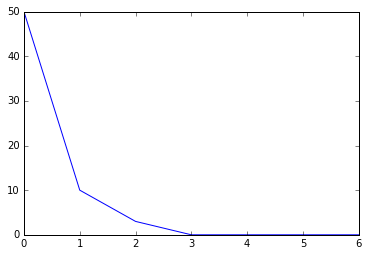

In [27]:
shuff = 7
Sdeck = D52
shuff_R52_1 = R52_1
shuff_R52_2 = R52_2
rpts = np.zeros(shuff)
grps_Sdeck = np.zeros(shuff)
grps_R52_1 = np.zeros(shuff)
grps_R52_2 = np.zeros(shuff)

for i in range(shuff):
    rpts[i] = repeated(shuff_R52_2)
    grps_Sdeck[i] = three_consecutive(Sdeck)
    grps_R52_1[i] = three_consecutive(shuff_R52_1)
    grps_R52_2[i] = three_consecutive(shuff_R52_2)
    ## print(repeated(shuff_R52_2))
    Sdeck = shuffle(Sdeck)
    shuff_R52_1 = shuffle(shuff_R52_1)
    shuff_R52_2 = shuffle(shuff_R52_2)
    

print("The original shuffled deck of 52 cards after 7 shuffles: \n", np.array(Sdeck))
print("List of number of ordered sequences at each iteration: ", grps_Sdeck)
plt.plot(grps_Sdeck)
plt.show()
print()

The deck with a single repeated card after 7 shuffles: 
 [ 31.   7.  30.  25.  35.   0.  26.  50.   9.   4.  18.  21.  22.  51.   6.
  46.  36.  47.  38.  49.  37.  39.  11.  41.   2.   2.  10.  44.  45.  40.
  19.  16.  24.  34.  12.  42.  15.  32.  48.  28.   5.  27.  33.  43.  13.
   8.  23.  17.  20.   3.  29.  14.]

List of number of ordered sequences at each iteration:  [ 48.  11.   4.   1.   0.   0.   0.]


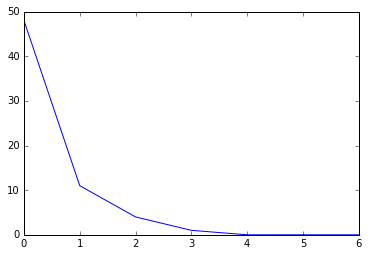

In [28]:
print("The deck with a single repeated card after 7 shuffles: \n", shuff_R52_1)
print()
print("List of number of ordered sequences at each iteration: ", grps_R52_1)
plt.plot(grps_R52_1)
plt.show()

The deck with 52 cards and 2 of every element after 7 shuffles: 
 [ 47.  25.   3.  49.  31.   3.  39.  19.  47.  51.   7.  41.  27.  17.  45.
  23.  37.   9.  43.  39.  15.   1.  19.  41.  21.  33.  31.  45.  35.   1.
  11.  23.   7.   9.  25.  35.  43.  29.  11.  29.  13.  15.  27.  13.  49.
  33.  21.   5.  17.  51.   5.  37.]

Pairs of repeated elements (side by side):  [ 26.  16.   9.   4.   0.   0.   1.]


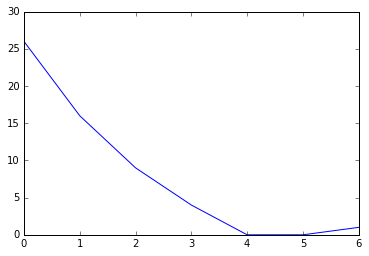

List of number of ordered sequences at each iteration:  [ 0.  1.  1.  3.  1.  1.  1.]


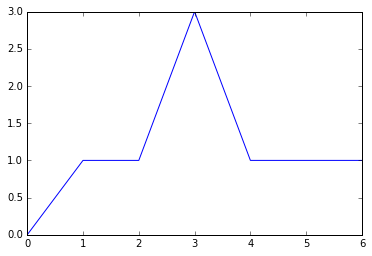

Actually here, we don't see repeated elements immediately next to one another, that quickly gets taken care of.
Instead, the number of ordered sequences actually increases, much unlike the other cases.


In [32]:
print("The deck with 52 cards and 2 of every element after 7 shuffles: \n", shuff_R52_2)
print()
print("Pairs of repeated elements (side by side): ", rpts)
plt.plot(rpts)
plt.show()

print("List of number of ordered sequences at each iteration: ", grps_R52_2)
plt.plot(grps_R52_2)
plt.show()

print("Actually here, we don't see repeated elements immediately next to one another, that quickly gets taken care of.")
print("Instead, the number of ordered sequences actually increases, much unlike the other cases.")